<a href="https://colab.research.google.com/github/RAJ-15012006/delta/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Time Series?
* Across industries, organizations commonly use time series data, which refers to any information collected over a regular interval of time in their operations. Examples include daily stock prices, energy consumption rates, social media engagement metrics, and retail demand among others. Analyzing time series data yields insights like trends, seasonal patterns and forecasts into future events that can help generate profits. For example, by understanding the seasonal trends in demand for retail products, companies can plan promotions to maximize sales throughout the year.
* There are multiple time series algorithms that are optimized for forecasting continuous values, such as temperature or product sales. A time series model can predict trends based only on the original dataset collected over a period of time.

**White noise**
* A time series is white noise if the variables are independent and identically distributed with a mean of zero. This means that all variables have the same variance (sigma^2) and each value has a zero correlation with all other values in the series.


**Data patterns**

**cycle**
* A cyclic pattern occurs when data rise and fall, but this does not happen within the fixed time and the duration of these fluctuations is usually at least 2 years
![](cycle.png)

**Trend**
* A trend pattern exists when there is a long-term increase or decrease in the series. The trend can be linear, exponential
![](trend.png)

**Seasonal**
* Seasonality exists when data is influenced by seasonal factors, such as a day of the week, a month, and one-quarter of the year. A seasonal pattern exists of a fixed known period.
![](sea.png)

**Random**
* which do not follow any trend, cycle or seasonal patterns
![](ran.png)


**Types**
* Types of time series models are moving average, ARIMA etc.The crucial thing is to choose the right forecasting method as per the characteristics of the time series data. The following are some of the basic time series models:



**MA(Moving Average)**
* A moving average is defined as an average of fixed number of items in the time series which move through the series by dropping the top items of the previous averaged group and adding the next in each successive average.
Yt depends only on random error terms
     	Yt = f( εt, εt-1, εt-2, εt-3, ..)
		or
 	Yt = β + εt + θ1 εt-1 + θ2εt-2 + θ3 εt-3 +…



**AR(Auto Regressive)**
* Autoregression is a time series model that uses observations from previous time steps as input to a regression equation to predict the value at the next time step. It is a very simple idea that can result in accurate forecasts on a range of time series problems.
* Yt depends only of past values.
* Yt-1, Yt-2, Yt-3 etc
              * Yt  = f(Yt-1, Yt-2, Yt-3… )
              * Yt = β0 + β1Yt-1 + β2Yt-2 + β3Yt-3 …


**ARMA**
* Time series, autoregressive–moving-average (ARMA) models provide a parsimonious description of a (weakly) stationary stochastic process in terms of two polynomials, one for the autoregression (AR) and the second for the moving average (MA).
* Combines AR and MA
	* Yt = β0 + β1Yt-1 + β2Yt-2 + β3Yt-3 …εt + θ1 εt-1 + θ2εt-2 + θ3 εt-3 +…


**ARIMA**
* Autoregressive Integrated Moving Average (ARIMA) model is another widely used forecasting technique that involves the combination of two or more time series models. This model is suitable for multivariate non-stationary data. ARIMA method is based on the concepts of autoregression, autocorrelation, and moving average.






### Create a Time Series Model to predict the future air passenger traffic

In [ ]:
## Importing librries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
## loading the data
data=pd.read_csv('/content/AirPassengers.csv')

# we have data of airline passengers travelled between January 1949 and December 1960

In [ ]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
data.shape
#144 rows 2 col

(144, 2)

In [ ]:
data.head() #first five rows

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data.tail() #last 5 rows

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [ ]:
data.dtypes

,0
Month,object
#Passengers,int64


In [ ]:
data.info() #info about datatype and null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
# Month is actually given as string/object here. It must be in date-time format

In [ ]:
# parse_dates: parsing the date (Converts the string representation of a date to Date object)
# index_col: using date column as index

data=pd.read_csv('/content/AirPassengers.csv',parse_dates=[0],index_col='Month')

In [ ]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
data.rename(columns = {'#Passengers': 'Passengers'}, inplace = True)

In [ ]:
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
data.describe()##used to view some basic statistical details like percentile, mean, std etc.

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


# EDA

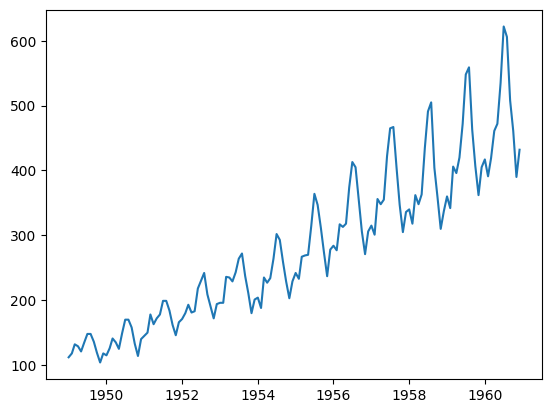

In [ ]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(6,3))#canvas  size
plt.plot(data)#line plot
#plt.tight_layout()
## from plot we can see the series given is not stationary

## Stationarity

* Stationarity means that the statistical properties of a time series (or rather the process generating it) do not change over time.
* Stationarity is important because many useful analytical tools and statistical tests and models rely on it.

* Constant mean
* Constant variance
* Constant covariance between periods of identical distance

* All it states is that the covariance between time periods of identical lengths (let’s say 10 days/hours/minutes) should be identical to the covariance of some other period of the same length:

![image-2.png](attachment:image-2.png)



**Why do we need Stationarity?**
- Stationary processes are easier to analyze
- Stationarity is assumed by most of the algorithms
- It is essential to remove any trend or seasonality before modeling the time series data because if the statistical properties do not change over time, it is easier to model the data accurately. One of the popular ways of making the series stationary is differencing.

**How to check if given series is stationary or not:**
- One way is to check autocorrelation.
- Autocorrelation is the similarity between observations as a function of the time lag between them.

* When plotting the value of the ACF for increasing lags (a plot called a correlogram), the values tend to degrade to zero quickly for stationary time series, while for non-stationary data the degradation will happen more slowly.

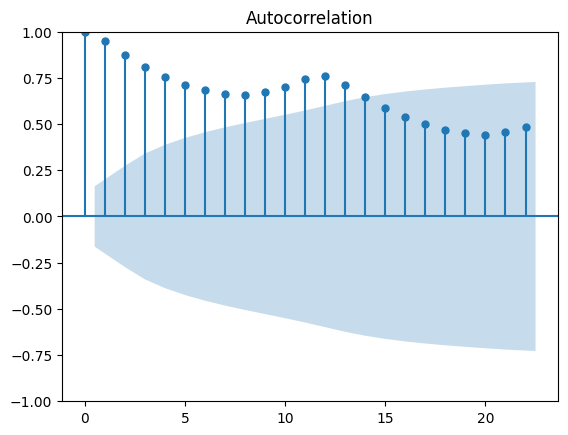

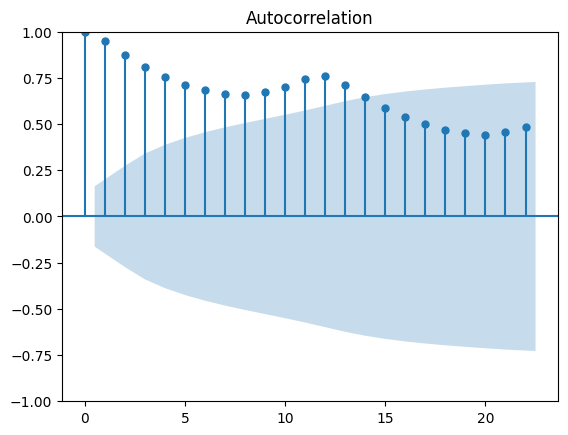

In [ ]:
## Plotting the autocorrelation function
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)


3 method -- ADfuller -- check the data is stationary or not

1. hypothetical test that is based on hypothesis

2. all the hypo tests will give us a score , that score is called as p value

3. the p value decides whether the result what we obtanied should be accepted or not

In [ ]:
# 1, ad fuller test is performed
# 2. this test gives us 5 values , one amoung these 5 valyes is p value
# 3. take this p value and compare if p value < 0.05 then we say data is stationary

In [ ]:
# ADfuller Test to check stationarity

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.Passengers, autolag = 'AIC')#AIC
dftest
# 0.991880243437641, is our p_value
# compare with alpha 0.05
# since p > alpha , we say time series is non stationary

(np.float64(0.8153688792060498),
 np.float64(0.991880243437641),
 13,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(996.692930839019))

from the 3 methods

1. line plot

2. autp corelation plot

3. AdFuller test

by all the methods , we got to know that data is non stationary

In [ ]:
data.head() # Series integrated to the order of 1

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
data1 = data.diff(periods=1)#that is applying diff for 1 time on data
data1.head()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0


In [ ]:
data1=data1.iloc[1:] #null value discarded
data1.head()

,Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0


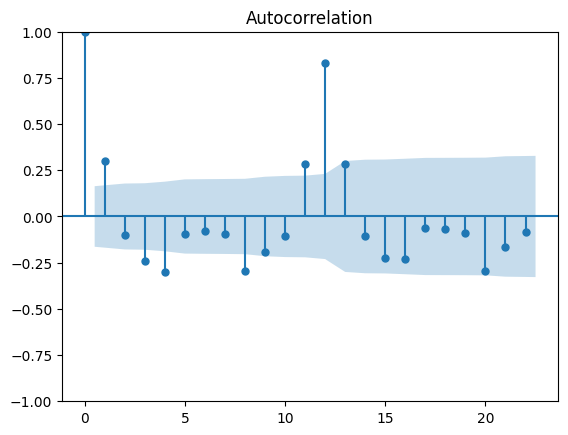

In [ ]:
plot_acf(data1); # autocorrelation plot

In [ ]:
data2 = data1.diff(periods=1) # differencing applied to data1
data2.head()

,Passengers
Month,
1949-02-01,NaN
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0


In [ ]:
data2=data2.iloc[1:] # integrated to the order of 2

In [ ]:
data2.head()

,Passengers
Month,
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0
1949-07-01,-1.0


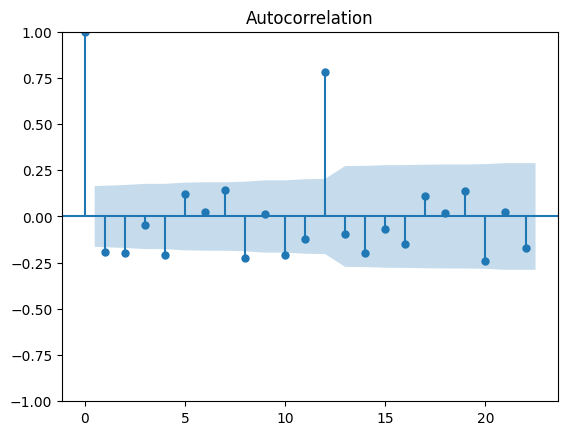

In [ ]:
plot_acf(data2);

In [ ]:
data2.shape#shape of the data rows and columns

(142, 1)

In [ ]:
## Creating training and test sets

train = data2[:100] #from 0th row to 99th row - traning data

test = data2[100:] #from 100th row to end - testing data

In [ ]:
train.info()#info about datatype and null value

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 1949-03-01 to 1957-06-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  100 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [ ]:
pip install statsmodels

In [ ]:
## Applying autoregressive model

#from statsmodels.tsa.ar_model import AR
##from statsmodels.tsa.ar_model import AutoReg

from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')

In [ ]:

#ar_select_order : gives the best lags ordered as an array

# to select the optimal values for lags
from statsmodels.tsa.ar_model import ar_select_order

mod = ar_select_order(data2,maxlag=15,glob=True)
mod.ar_lags

# select_order: selects the best number of lags
# maxlag: The maximum lag to consider
# glob: global search across all combinations of lags

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [ ]:
## model creation
ar_model = AutoReg(train,lags=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]) ## object creation with lags specified

ar_model_fit = ar_model.fit() #training the model

In [ ]:
##making prediction
prediction = ar_model_fit.predict(start=100,end=142)

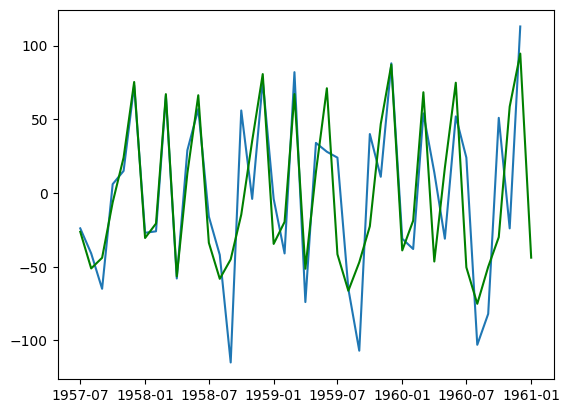

In [ ]:
import matplotlib.pyplot as plt

plt.plot(test)  #actual data
plt.plot(prediction,color='green') #graph of test vs prediction

## ARIMA Model

In [ ]:
## importing the library
from statsmodels.tsa.arima.model import ARIMA

#arima --- AR , I , MA
#arima---(p,d,q)---these p d q are to be given to the arima model by user

Akaike Information Criteria (AIC):

AIC is an estimator of prediction error which measures a statistical model in order to quantify the goodness of fit of the model. While comparing two models, the smaller the AIC value, the better the time series model.

![image.png](attachment:image.png)
K: The number of model parameters.
ln(L): The log-likelihood of the model. This tells us how likely the model is, given the data.


AIC uses a model’s maximum likelihood estimation (log-likelihood) as a measure of fit. Log-likelihood is a measure of how likely one is to see their observed data, given a model. The model with the maximum likelihood is the one that “fits” the data the best. The natural log of the likelihood is used as a computational convenience.

AIC is low for models with high log-likelihoods. This means the model fits the data better, which is what we want.

Once you’ve fit several regression models, you can compare the AIC value of each model. The model with the lowest AIC offers the best fit.

There is no value for AIC that can be considered “good” or “bad” because we simply use AIC as a way to compare regression models. The model with the lowest AIC offers the best fit. The absolute value of the AIC value is not important.

In [ ]:
## Geeting the optimal values of p,q an d
import itertools

p =d= q=range(0,5)#values of p,d,q range from 0 to 4
# [0,1,2,3,4]
# [0,1,2,3,4]
# [0,1,2,3,4]

pdq = list(itertools.product(p,d,q))
# is used to find the cartesian product from the given iterator, output is lexicographic ordered.
pdq #number of combinaton of pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [ ]:
##The Python try… except statement catches an exception. It is used to test code for an error which is written in the “try” statement.
#If an error is encountered, the contents of the “except” block are run.
list1=[]  #i will be storing the pdq
list2=[]  # i will be stpring aic value

# it will be easy for me to compaare for which combo of pdf what aic is there

# later on i will go to list where i ahve aic score , get the mini aic

# which eveer combo is givng me the lower aic score that will eb taken as precise pdq value

for params in pdq: #iterating params over pdq
        model_arima = ARIMA(train, order=params)#training model on various pdq values
        model_arima_fit = model_arima.fit()#training
        print(params, model_arima_fit.aic)#printing parameter and aic values
        list1.append(params)
        list2.append(model_arima_fit.aic)


(0, 0, 0) 967.9135518309452
(0, 0, 1) 931.4372807118069
(0, 0, 2) 925.7296657034741
(0, 0, 3) 920.9009361677204
(0, 0, 4) 912.6570340252462
(0, 1, 0) 1046.731900142016
(0, 1, 1) 963.8739375096601
(0, 1, 2) 933.2130049082082
(0, 1, 3) 926.5735366854558
(0, 1, 4) 924.3116821884702
(0, 2, 0) 1143.9983209809495
(0, 2, 1) 1043.7570583591555
(0, 2, 2) 966.1633163353679
(0, 2, 3) 941.613810934949
(0, 2, 4) 933.7567886648451
(0, 3, 0) 1247.20709797673
(0, 3, 1) 1139.8659457768256
(0, 3, 2) 1044.647156590476
(0, 3, 3) 972.3660359308682
(0, 3, 4) 955.7259990219327
(0, 4, 0) 1351.0676097034006
(0, 4, 1) 1241.6050826098137
(0, 4, 2) 1139.2023538472185
(0, 4, 3) 1048.6637049290428
(0, 4, 4) 987.5087447453964
(1, 0, 0) 963.0127961450206
(1, 0, 1) 928.7077561479304
(1, 0, 2) 919.8685369472124
(1, 0, 3) 921.8388143407459
(1, 0, 4) 923.3886062441226
(1, 1, 0) 1021.0396389673773
(1, 1, 1) 959.4979666999722
(1, 1, 2) 962.9514176500866
(1, 1, 3) 923.2263383651344
(1, 1, 4) 923.101361355574
(1, 2, 0) 1098.

In [ ]:
min(list2)  # lowest aic score

np.float64(904.911802260021)

In [ ]:
# pdq corresponding to lowest aic
loc=list2.index(min(list2))
list1[loc]

(4, 0, 3)

In [ ]:
## create the final model with lowest aic score parameter
model_arima = ARIMA(train, order=(4, 0, 3))

model_arima_fit = model_arima.fit() #training

In [ ]:
print(model_arima_fit.aic) # confirm aic score

904.911796553927


In [ ]:
forecast = model_arima_fit.forecast(steps=9)
forecast

,predicted_mean
1957-07-01,-51.878720
1957-08-01,-22.750248
1957-09-01,22.965234
1957-10-01,-22.794747
1957-11-01,5.528661
1957-12-01,28.125388
1958-01-01,-28.701990
1958-02-01,-0.724768
1958-03-01,26.554226


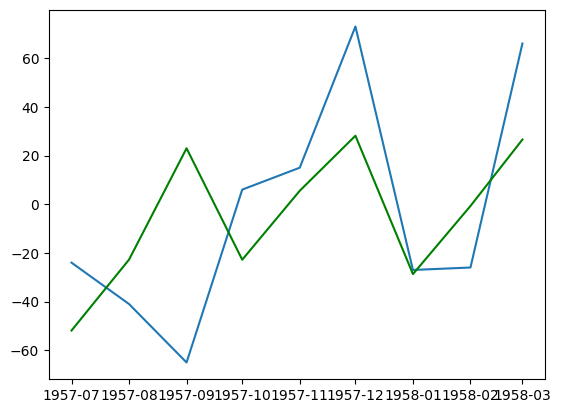

In [ ]:
# Comparision of actual vs predicted for 9 values
plt.plot(test[:9])
plt.plot(forecast,color='green')#line plot for prediction

In [ ]:
forecast25 = model_arima_fit.forecast(steps=25)
test1 = test[0:25].values.flatten()
test1

array([ -24.,  -41.,  -65.,    6.,   15.,   73.,  -27.,  -26.,   66.,
        -58.,   29.,   57.,  -16.,  -42., -115.,   56.,   -4.,   76.,
         -4.,  -41.,   82.,  -74.,   34.,   28.,   24.])

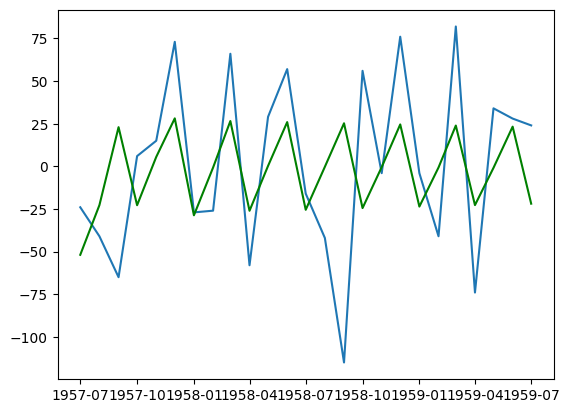

In [ ]:
# Comparision of actual vs predicted for 25 values
plt.plot(test[:25])
plt.plot(forecast25,color='green') #line plot for prediction

In [ ]:
# Accuracy metrics
import numpy as np
def forecast_accuracy(forecast, actual):
    mse = np.mean((forecast - actual)**2)        # MSE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE


    return({'mse':mse, 'mae': mae, 'rmse':rmse})

forecast_accuracy(forecast25, test1)

{'mse': np.float64(2351.37952423803),
 'mae': np.float64(38.28583379198828),
 'rmse': np.float64(48.49102519268932)}

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
print(rmse(test1, forecast25))

# Calculate mean squared error
mean_squared_error(test1, forecast25)


48.490856512691145


2351.363165334401